In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor

## Concat all the monthly csv files into one

In [ ]:
# filenames
df1 = pd.read_csv("../data/apr18.csv")
df2 = pd.read_csv("../data/may18.csv")
df3 = pd.read_csv("../data/jul18.csv")
df4 = pd.read_csv("../data/aug18.csv")
df5 = pd.read_csv("../data/sep18.csv")
df6 = pd.read_csv("../data/oct18.csv")
df7 = pd.read_csv("../data/nov18.csv")
df8 = pd.read_csv("../data/dec18.csv")
df9 = pd.read_csv("../data/jan19.csv")
df10 = pd.read_csv("../data/feb19.csv")

airbnb = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

airbnb.to_csv("../data/airbnb.csv")

## Read the concatenated csv file 

In [59]:
df= pd.read_csv('../data/airbnb.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (53,106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
print(df.shape)
print(df.columns.tolist())

(61280, 107)
['Unnamed: 0', 'access', 'accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review', 'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 'instant_bookable', 'interac

In [61]:
# Remove the dollar signs in the 'extra_people' column
df['extra_people'] = df['extra_people'].astype(str)
df['extra_people'] = df['extra_people'].str.replace('$', '')
df['extra_people'] = df['extra_people'].astype(float)

# Remove the dollar signs and commas in the 'price' column
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

# Remove the dollar signs and commas in the 'security_deposit' column
df['security_deposit'] = df['security_deposit'].astype(str)
df['security_deposit'] = df['security_deposit'].str.replace('$', '')
df['security_deposit'] = df['security_deposit'].str.replace(',', '')
df['security_deposit'] = df['security_deposit'].astype(float)

# Remove the dollar signs in the 'cleaning_fee' column
df['cleaning_fee'] = df['cleaning_fee'].astype(str)
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)

In [62]:
df = df.dropna(axis = 0, subset = ['zipcode'])

In [63]:
df["zipcode"] = df["zipcode"].astype(str)
df["zipcode"] = [x.replace('.0','') for x in df["zipcode"]]
df['zipcode'] = df['zipcode'].str.replace('02134-1704','02134').replace('02108 02111','02108')
df = df[df.zipcode != "G4 0ET"]
df['zipcode'].unique()

array(['02128', '02119', '02131', '02108', '02120', '02118', '02115',
       '02111', '02215', '02116', '02134', '02109', '02125', '02114',
       '02130', '02122', '02129', '02135', '02127', '02124', '02145',
       '02113', '02132', '02121', '02138', '02152', '02139', '02467',
       '02445', '02136', '02446', '02126', '02210', '02458', '02186',
       '02163', '02151', '02472', '02110', '02026', '02141', '33131',
       '02150', '02171', '02143', '02149', '02180', '02459', '02199',
       '02142', '02222', '02447', '01217', '2128', '2119', '2131', '2108',
       '2118', '2115', '2111', '2215', '2116', '2109', '2125', '2114',
       '2122', '2130', '2129', '2120', '2134', '2135', '2127', '2124',
       '2113', '2132', '2121', '2110', '2126', '2136', '2467', '2163',
       '2145', '2210', '2446', '2143', '2149', '2139', '1217', '2141',
       '2421', '2445', '2138', '2150', '2186', '2026'], dtype=object)

In [64]:
df['zipcode'] = df['zipcode'].astype(int)

## Sorting values by zipcode and Property type to handle the missing values

In [65]:
df = df.sort_values(by=['zipcode','property_type'])

In [66]:
mean = df.groupby(['zipcode','property_type']).mean()
mean.head(10)

Unnamed: 0  accommodates  availability_30  \
zipcode property_type                                                
1217    Apartment       5841.333333      3.000000         2.833333   
2026    Apartment       5945.333333      3.000000        27.000000   
        Bungalow        3705.500000      2.500000        21.000000   
        Condominium     2370.000000      2.000000        14.000000   
        House           4893.800000      4.700000        11.200000   
        Other           4452.000000      2.000000        20.000000   
2108    Apartment       2165.347826      3.546584         9.689441   
        Boutique hotel  6169.000000      2.000000        23.000000   
        Condominium     2244.660000      3.000000         8.770000   
        Hostel          2268.500000      2.000000        30.000000   

                        availability_365  availability_60  availability_90  \
zipcode property_type                                                        
1217    Apartment             271.833333        10.833333        28.333333   
2026    Apartment             231.666667        53.666667        82.666667   
        Bungalow              212.000000        44.500000        74.500000   
        Condominium           349.000000        44.000000        74.000000   
        House                 182.700000        28.000000        49.600000   
        Other                 349.000000        47.000000        77.000000   
2108    Apartment             131.413665        23.836025        40.284472   
        Boutique hotel        342.000000        52.000000        79.000000   
        Condominium           204.150000        22.010000        38.590000   
        Hostel                179.500000        60.000000        90.000000   

                        bathrooms  bedrooms      beds  \
zipcode property_type                                   
1217    Apartment        1.500000  1.000000  1.500000   
2026    Apartment        1.000000  1.333333  2.000000   
        Bungalow         1.000000  1.000000  1.000000   
        Condominium      1.000000  1.000000  1.000000   
        House            1.550000  2.300000  2.666667   
        Other            1.000000  0.000000  2.000000   
2108    Apartment        1.185093  1.437267  1.735404   
        Boutique hotel   1.000000  0.000000  1.000000   
        Condominium      1.170000  1.200000  1.530000   
        Hostel           1.000000  1.000000  1.000000   

                        calculated_host_listings_count       ...        \
zipcode property_type                                        ...         
1217    Apartment                            35.666667       ...         
2026    Apartment                             1.000000       ...         
        Bungalow                              1.500000       ...         
        Condominium                           1.000000       ...         
        House                                 1.100000       ...         
        Other                                 1.000000       ...         
2108    Apartment                            75.370186       ...         
        Boutique hotel                        3.000000       ...         
        Condominium                          14.470000       ...         
        Hostel                                1.000000       ...         

                        review_scores_communication  review_scores_location  \
zipcode property_type                                                         
1217    Apartment                               NaN                     NaN   
2026    Apartment                         10.000000                8.000000   
        Bungalow                          10.000000               10.000000   
        Condominium                             NaN                     NaN   
        House                              9.000000                9.750000   
        Other                              9.000000                9.000000   
2108    Apartment                        

In [13]:
mean.to_csv('../data/mean_acc_zip_property_type.csv')

## Handling missing bedrooms value. Replacing the missing value with the mean of the values grouped by zip code and property type

In [68]:
df[df['bedrooms'].isnull()].head()

,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
55103,6225,Elevator direct access to unit.,2,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Paid p...",27,217,57,87,1.0,Real Bed,...,This space is priced better than neighboring h...,NaN,MA,"Boston, MA, United States",The Financial District is downtown’s business ...,NaN,Green Line- Government Center Orange Line- Sta...,NaN,NaN,2109
61133,6008,Elevator direct access to unit.,2,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Paid p...",26,193,56,86,1.0,Real Bed,...,This space is priced better than neighboring h...,NaN,MA,"Boston, MA, United States",The Financial District is downtown’s business ...,NaN,Green Line- Government Center Orange Line- Sta...,NaN,NaN,2109
9,9,NaN,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",28,358,53,83,1.0,Real Bed,...,Relax in a quiet brownstone nestled quietly be...,NaN,MA,"Boston, MA, United States",Amazing little brownstone building one-half bl...,NaN,NaN,NaN,NaN,2115
277,277,NaN,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",28,358,53,83,1.0,Real Bed,...,Relax in a quiet brownstone nestled quietly be...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115
42816,155,NaN,2,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",29,361,59,89,1.0,Real Bed,...,Relax in a quiet brownstone nestled quietly be...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115


In [69]:
bool_bedrooms_na = df['bedrooms'].isna()
bool_2121_bedrooms= df['zipcode'] == 2115
bool_property_bedrooms = df['property_type'] == 'Serviced apartment'
need_replacement=bool_2121_bedrooms & bool_bedrooms_na & bool_property_bedrooms
df.loc[need_replacement,'bedrooms']=2

In [70]:
df['bedrooms'].fillna(1, inplace=True)
df['bedrooms'].isnull().sum()

0

## Handling missing bathrooms value by replacing with mean

In [71]:
df[df['bathrooms'].isnull()].head()

,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
62,62,NaN,3,"{TV,""Cable TV"",Internet,""Air conditioning"",""Wh...",30,89,60,89,NaN,Real Bed,...,The minute you step through the door to these ...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115
36431,66,NaN,3,"{TV,""Cable TV"",Internet,""Air conditioning"",""Wh...",29,89,59,89,NaN,Real Bed,...,The minute you step through the door to these ...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115
42722,61,NaN,3,"{TV,""Cable TV"",Internet,""Air conditioning"",""Wh...",29,89,59,89,NaN,Real Bed,...,The minute you step through the door to these ...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115
48937,59,NaN,3,"{TV,""Cable TV"",Internet,""Air conditioning"",""Wh...",29,89,59,89,NaN,Real Bed,...,The minute you step through the door to these ...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115
55184,59,NaN,3,"{TV,""Cable TV"",Internet,""Air conditioning"",""Wh...",29,89,59,89,NaN,Real Bed,...,The minute you step through the door to these ...,NaN,MA,"Boston, MA, United States",NaN,NaN,NaN,NaN,NaN,2115


In [72]:
bool_bath_na = df['bathrooms'].isna()
bool_2115_bath= df['zipcode'] == 2115
bool_property_bath = df['property_type'] == 'Bed and breakfast'
need_replacement1=bool_2115_bath & bool_bath_na & bool_property_bath
df.loc[need_replacement1,'bathrooms']= 0

In [73]:
bool_2130_bath= df['zipcode'] == 2130
bool_property1_bath = df['property_type'] == 'House'
need_replacement2= bool_bath_na & bool_2130_bath &  bool_property1_bath
df.loc[need_replacement2,'bathrooms']= 2

In [74]:
bool_2116_bath= df['zipcode'] == 2116
bool_property2_bath = df['property_type'] == 'Bed and breakfast'
need_replacement3= bool_bath_na & bool_2116_bath &  bool_property2_bath
df.loc[need_replacement3,'bathrooms']= 2

In [75]:
bool_property1_bath = df['property_type'] == 'House'
need_replacement4= bool_bath_na & bool_2116_bath &  bool_property1_bath
df.loc[need_replacement4,'bathrooms']= 2
df['bathrooms'].fillna(1, inplace=True)

In [76]:
df['bathrooms'].isnull().sum()

0

## Checking the missing values for beds

In [77]:
df[df['beds'].isnull()].head()

,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
55112,6234,While house but there is a one bedroom apartme...,6,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",25,359,55,84,1.0,Real Bed,...,"One adult bedroom with queen bed, two kids roo...",NaN,MA,"Dedham, MA, United States",Huge backyard with access to the Charles River...,NaN,NaN,NaN,NaN,2026
1356,1356,NaN,1,"{Wifi,""Air conditioning"",Elevator,Heating,Wash...",0,0,0,0,1.0,Real Bed,...,NaN,NaN,MA,"Boston, MA, United States",This is a clean bedroom. My house is nearby th...,NaN,NaN,NaN,NaN,2115
7572,1179,NaN,1,"{Wifi,""Air conditioning"",Elevator,Heating,Wash...",0,0,0,0,1.0,Real Bed,...,NaN,NaN,MA,"Boston, MA, United States",This is a clean bedroom. My house is nearby th...,NaN,NaN,NaN,NaN,2115
13490,1129,NaN,1,"{Wifi,""Air conditioning"",Elevator,Heating,Wash...",0,0,0,0,1.0,Real Bed,...,NaN,NaN,MA,"Boston, MA, United States",This is a clean bedroom. My house is nearby th...,NaN,NaN,NaN,NaN,2115
19490,1132,NaN,1,"{Wifi,""Air conditioning"",Elevator,Heating,Wash...",0,0,0,0,1.0,Real Bed,...,NaN,NaN,MA,"Boston, MA, United States",This is a clean bedroom. My house is nearby th...,NaN,NaN,NaN,NaN,2115


In [78]:
bool_beds_na = df['beds'].isna()
bool_property_beds = df['property_type'] == 'House'
bool_2026_beds= df['zipcode'] == 2026
need_replacement= bool_beds_na & bool_2026_beds &  bool_property_beds
df.loc[need_replacement,'beds']= 3

In [79]:
bool_property_beds = df['property_type'] == 'Other'
bool_2115_beds= df['zipcode'] == 2115
need_replacement= bool_beds_na & bool_2115_beds &  bool_property_beds
df.loc[need_replacement,'beds']= 1

In [80]:
bool_2121_beds= df['zipcode'] == 2121
bool_property_beds = df['property_type'] == 'House'
need_replacement= bool_beds_na & bool_2121_beds &  bool_property_beds
df.loc[need_replacement,'beds']= 1

In [81]:
df['beds'].fillna(2, inplace=True)
df['beds'].isnull().sum()

0

In [82]:
df['price'].describe()

count    60762.000000
mean       187.897222
std        269.297527
min          0.000000
25%         80.000000
50%        144.000000
75%        215.000000
max       5000.000000
Name: price, dtype: float64

## Checking the percentage of null values in all columns

In [83]:
(df.isnull().sum()/len(df))*100

Unnamed: 0                                        0.000000
access                                           41.361377
accommodates                                      0.000000
amenities                                         0.000000
availability_30                                   0.000000
availability_365                                  0.000000
availability_60                                   0.000000
availability_90                                   0.000000
bathrooms                                         0.000000
bed_type                                          0.000000
bedrooms                                          0.000000
beds                                              0.000000
calculated_host_listings_count                    0.000000
calculated_host_listings_count_entire_homes      79.730753
calculated_host_listings_count_private_rooms     79.730753
calculated_host_listings_count_shared_rooms      79.730753
calendar_last_scraped                             0.0000

## Dropping columns with 98% or more missing values

In [84]:
df.drop(columns=['xl_picture_url','thumbnail_url','square_feet','neighbourhood_group_cleansed','license',
                      'host_acceptance_rate','medium_url'],inplace = True)

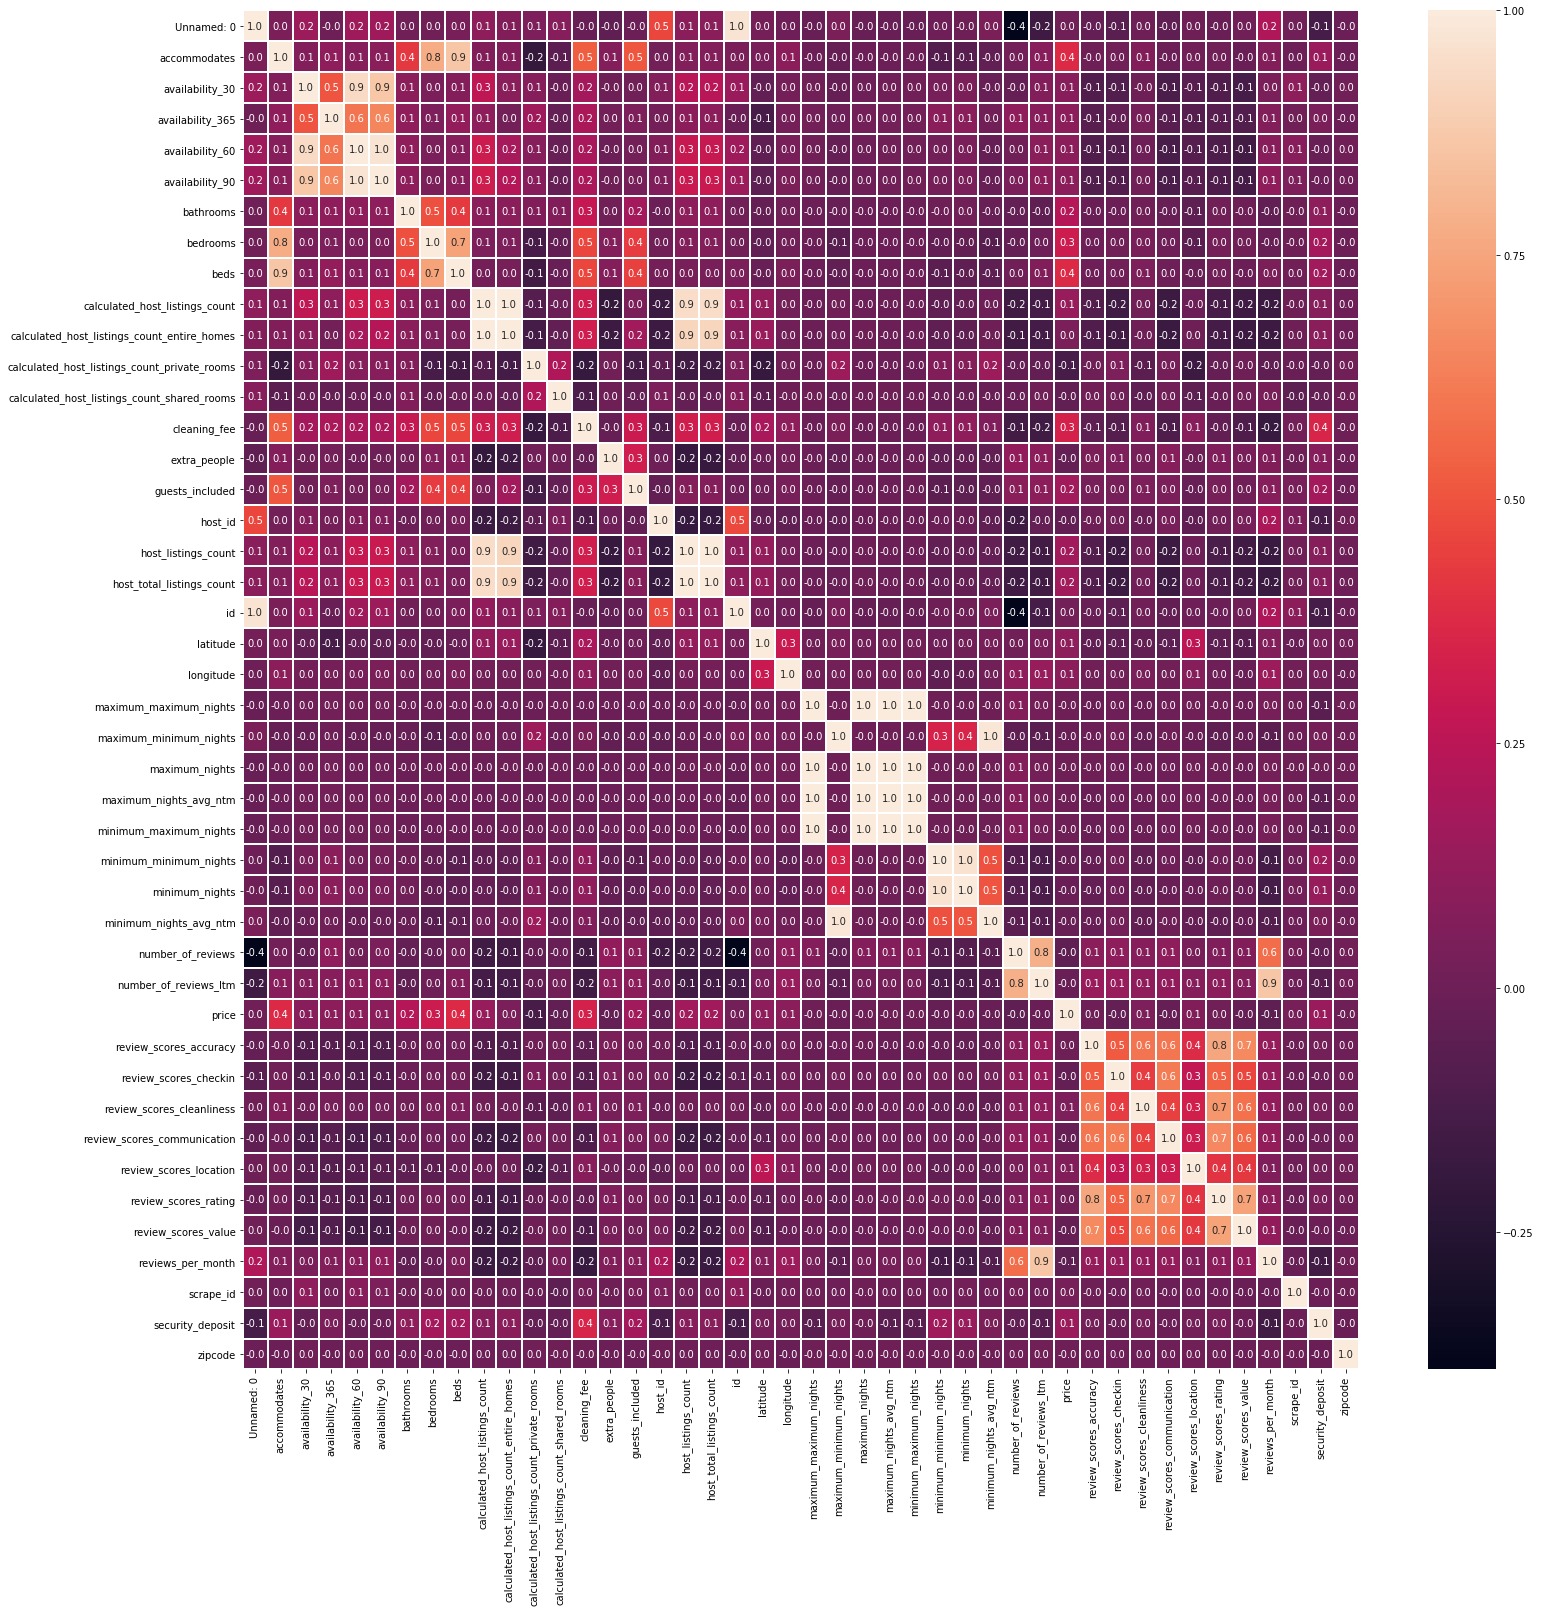

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, linewidths = 1, fmt = '.1f', ax=ax)
plt.show()
%matplotlib inline

## Data Cleaning (Removing Unnecessary Features)

In [85]:
df = df.drop(columns=['Unnamed: 0', 'access', 'availability_30', 'availability_365', 'availability_60', 
'availability_90','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
'calendar_last_scraped', 'calendar_updated', 'city','country', 'country_code',  'experiences_offered', 
'first_review', 'has_availability', 'host_about', 'host_has_profile_pic', 'host_id',
'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 
'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 
'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 
'instant_bookable', 'interaction', 'is_location_exact', 'jurisdiction_names', 'last_review', 'last_scraped',
'latitude', 'listing_url', 'longitude', 'market', 'maximum_maximum_nights', 'maximum_minimum_nights', 
'maximum_nights', 'maximum_nights_avg_ntm', 'minimum_maximum_nights', 'minimum_minimum_nights',
'minimum_nights_avg_ntm', 'monthly_price', 'neighbourhood', 'notes', 
'number_of_reviews_ltm', 'picture_url', 'require_guest_phone_verification', 
'require_guest_profile_picture', 'requires_license', 'review_scores_accuracy', 'review_scores_checkin',
'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location','review_scores_value',
                      
'reviews_per_month','scrape_id','smart_location', 'state', 'street', 
'transit', 'weekly_price'])

In [86]:
(df.isnull().sum()/len(df))*100

accommodates                 0.000000
amenities                    0.000000
bathrooms                    0.000000
bed_type                     0.000000
bedrooms                     0.000000
beds                         0.000000
cancellation_policy          0.000000
cleaning_fee                17.267371
description                  0.543103
extra_people                 0.000000
guests_included              0.000000
is_business_travel_ready     0.000000
minimum_nights               0.000000
name                         0.027978
neighborhood_overview       33.539054
neighbourhood_cleansed       0.000000
number_of_reviews            0.000000
price                        0.000000
property_type                0.000000
review_scores_rating        21.133274
room_type                    0.000000
security_deposit            32.902143
space                       25.292123
summary                      2.616767
zipcode                      0.000000
dtype: float64

In [87]:
# Replace all the NaN values in "cleaning_fee" with the mean
mean_cleaning_fee = np.nanmean(df["cleaning_fee"])
df["cleaning_fee"].fillna(value=mean_cleaning_fee, inplace=True)

mean_review_scores_rating = np.nanmean(df["review_scores_rating"])
df["review_scores_rating"].fillna(value=mean_review_scores_rating, inplace=True)

mean_security_deposit = np.nanmean(df["security_deposit"])
df["security_deposit"].fillna(value=mean_security_deposit, inplace=True)

In [88]:
(df.isnull().sum()/len(df))*100

accommodates                 0.000000
amenities                    0.000000
bathrooms                    0.000000
bed_type                     0.000000
bedrooms                     0.000000
beds                         0.000000
cancellation_policy          0.000000
cleaning_fee                 0.000000
description                  0.543103
extra_people                 0.000000
guests_included              0.000000
is_business_travel_ready     0.000000
minimum_nights               0.000000
name                         0.027978
neighborhood_overview       33.539054
neighbourhood_cleansed       0.000000
number_of_reviews            0.000000
price                        0.000000
property_type                0.000000
review_scores_rating         0.000000
room_type                    0.000000
security_deposit             0.000000
space                       25.292123
summary                      2.616767
zipcode                      0.000000
dtype: float64

## Amenities

In [89]:
df['amenities'] = df['amenities'].str.replace('{','')
df['amenities'] = df['amenities'].str.replace('}','') 
df['amenities'] = df['amenities'].str.replace('"','')

In [90]:
amen = df['amenities'].tolist()
list = []
ammenties_count = []
for i in amen:
    list.append(i.split(','))
for j in list:
    ammenties_count.append(len(j))

In [91]:
df['ammenties_count'] = ammenties_count
df = df.reset_index(drop=True)
df.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,description,extra_people,...,number_of_reviews,price,property_type,review_scores_rating,room_type,security_deposit,space,summary,zipcode,ammenties_count
0,4,"TV,Internet,Wifi,Kitchen,Elevator,Washer,Dryer...",2.0,Real Bed,2.0,2.0,strict_14_with_grace_period,175.0,This beautifully furnished 2 bedroom apartment...,0.0,...,0,124.0,Apartment,93.456585,Entire home/apt,200.303238,Key Features - Designer and custom made furnit...,This beautifully furnished 2 bedroom apartment...,1217,12
1,2,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",1.0,Real Bed,0.0,1.0,strict_14_with_grace_period,150.0,This beautifully furnished studio in South Bos...,0.0,...,0,141.0,Apartment,93.456585,Entire home/apt,200.303238,Key Features - Designer and custom made furnit...,This beautifully furnished studio in South Bos...,1217,28
2,4,"TV,Internet,Wifi,Kitchen,Pets allowed,Elevator...",2.0,Real Bed,2.0,2.0,flexible,175.0,This beautifully furnished 2 bedroom apartment...,0.0,...,0,198.0,Apartment,93.456585,Entire home/apt,200.303238,Key Features - Designer and custom made furnit...,This beautifully furnished 2 bedroom apartment...,1217,13
3,2,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",1.0,Real Bed,0.0,1.0,flexible,150.0,This beautifully furnished studio in South Bos...,0.0,...,0,118.0,Apartment,93.456585,Entire home/apt,200.303238,Key Features - Designer and custom made furnit...,This beautifully furnished studio in South Bos...,1217,28
4,4,"TV,Internet,Wifi,Kitchen,Pets allowed,Elevator...",2.0,Real Bed,2.0,2.0,flexible,175.0,Show up and start living from Day One in this ...,0.0,...,0,198.0,Apartment,93.456585,Entire home/apt,200.303238,Key Features - Designer and custom made furnit...,Show up and start living from Day One in this ...,1217,13


In [92]:
df.columns

Index(['accommodates', 'amenities', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'cancellation_policy', 'cleaning_fee', 'description',
       'extra_people', 'guests_included', 'is_business_travel_ready',
       'minimum_nights', 'name', 'neighborhood_overview',
       'neighbourhood_cleansed', 'number_of_reviews', 'price', 'property_type',
       'review_scores_rating', 'room_type', 'security_deposit', 'space',
       'summary', 'zipcode', 'ammenties_count'],
      dtype='object')

In [93]:
df['property_type'].unique()

array(['Apartment', 'Bungalow', 'Condominium', 'House', 'Other',
       'Boutique hotel', 'Hostel', 'Hotel', 'Loft', 'Serviced apartment',
       'Townhouse', 'Aparthotel', 'Bed and breakfast', 'Boat',
       'Guest suite', 'Resort', 'Timeshare', 'Vacation home', 'Villa',
       'Guesthouse', 'Tiny house', 'Cabin', 'Dorm', 'Bus', 'Cottage',
       'In-law', 'Barn', 'Camper/RV', 'Farm stay', 'Campsite'],
      dtype=object)

In [94]:
df['neighbourhood_cleansed'].unique()

array(['South Boston', 'South Boston Waterfront', 'West Roxbury',
       'Hyde Park', 'Downtown', 'Beacon Hill', 'North End', 'East Boston',
       'Dorchester', 'Charlestown', 'Chinatown', 'Leather District',
       'Brighton', 'South End', 'West End', 'Back Bay', 'Allston',
       'Fenway', 'Mission Hill', 'Roxbury', 'Longwood Medical Area',
       'Jamaica Plain', 'Bay Village', 'Mattapan', 'Roslindale',
       'Harbor Islands'], dtype=object)

In [95]:
data = df.copy()
data.drop(columns=['ammenties_count'],inplace=True)
data.drop(columns=['space','summary','neighbourhood_cleansed'],inplace=True)
data.to_csv('../data/h2odata.csv')
data.head(5)

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,description,extra_people,...,minimum_nights,name,neighborhood_overview,number_of_reviews,price,property_type,review_scores_rating,room_type,security_deposit,zipcode
0,4,"TV,Internet,Wifi,Kitchen,Elevator,Washer,Dryer...",2.0,Real Bed,2.0,2.0,strict_14_with_grace_period,175.0,This beautifully furnished 2 bedroom apartment...,0.0,...,30,"2BR, South Boston, W/D & Gym, walk to Seaport ...",This furnished rental is located in South Bost...,0,124.0,Apartment,93.456585,Entire home/apt,200.303238,1217
1,2,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",1.0,Real Bed,0.0,1.0,strict_14_with_grace_period,150.0,This beautifully furnished studio in South Bos...,0.0,...,30,"Studio, South Boston, W/D, next to Broadway St...",This furnished rental is located in South Bost...,0,141.0,Apartment,93.456585,Entire home/apt,200.303238,1217
2,4,"TV,Internet,Wifi,Kitchen,Pets allowed,Elevator...",2.0,Real Bed,2.0,2.0,flexible,175.0,This beautifully furnished 2 bedroom apartment...,0.0,...,30,"Modern + Bright 2BR in Southie w/ Gym, by Blue...",This furnished rental is located in South Bost...,0,198.0,Apartment,93.456585,Entire home/apt,200.303238,1217
3,2,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",1.0,Real Bed,0.0,1.0,flexible,150.0,This beautifully furnished studio in South Bos...,0.0,...,30,"Airy studio in Southie w/ Gym, Doorman by Blue...",This furnished rental is located in South Bost...,0,118.0,Apartment,93.456585,Entire home/apt,200.303238,1217
4,4,"TV,Internet,Wifi,Kitchen,Pets allowed,Elevator...",2.0,Real Bed,2.0,2.0,flexible,175.0,Show up and start living from Day One in this ...,0.0,...,30,"Modern + Bright 2BR in Southie w/ Gym, by Blue...",This furnished rental is located in South Bost...,0,198.0,Apartment,93.456585,Entire home/apt,200.303238,1217


# Convert categorical data to numerical data using one-hot encoding

In [96]:
df['property_type'].unique()

array(['Apartment', 'Bungalow', 'Condominium', 'House', 'Other',
       'Boutique hotel', 'Hostel', 'Hotel', 'Loft', 'Serviced apartment',
       'Townhouse', 'Aparthotel', 'Bed and breakfast', 'Boat',
       'Guest suite', 'Resort', 'Timeshare', 'Vacation home', 'Villa',
       'Guesthouse', 'Tiny house', 'Cabin', 'Dorm', 'Bus', 'Cottage',
       'In-law', 'Barn', 'Camper/RV', 'Farm stay', 'Campsite'],
      dtype=object)

In [97]:
df = pd.get_dummies(df, columns =['bed_type','room_type','neighbourhood_cleansed','is_business_travel_ready',
                                 'cancellation_policy'], prefix = ['Bed','Room','Neighborhood',
                                                                  'Bussiness_ready','Cancellation'], drop_first = True)
df.head()

,accommodates,amenities,bathrooms,bedrooms,beds,cleaning_fee,description,extra_people,guests_included,minimum_nights,...,Neighborhood_South Boston,Neighborhood_South Boston Waterfront,Neighborhood_South End,Neighborhood_West End,Neighborhood_West Roxbury,Cancellation_moderate,Cancellation_strict,Cancellation_strict_14_with_grace_period,Cancellation_super_strict_30,Cancellation_super_strict_60
0,4,"TV,Internet,Wifi,Kitchen,Elevator,Washer,Dryer...",2.0,2.0,2.0,175.0,This beautifully furnished 2 bedroom apartment...,0.0,2,30,...,1,0,0,0,0,0,0,1,0,0
1,2,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",1.0,0.0,1.0,150.0,This beautifully furnished studio in South Bos...,0.0,1,30,...,0,1,0,0,0,0,0,1,0,0
2,4,"TV,Internet,Wifi,Kitchen,Pets allowed,Elevator...",2.0,2.0,2.0,175.0,This beautifully furnished 2 bedroom apartment...,0.0,2,30,...,1,0,0,0,0,0,0,0,0,0
3,2,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",1.0,0.0,1.0,150.0,This beautifully furnished studio in South Bos...,0.0,1,30,...,0,1,0,0,0,0,0,0,0,0
4,4,"TV,Internet,Wifi,Kitchen,Pets allowed,Elevator...",2.0,2.0,2.0,175.0,Show up and start living from Day One in this ...,0.0,2,30,...,1,0,0,0,0,0,0,0,0,0


In [98]:
df.columns

Index(['accommodates', 'amenities', 'bathrooms', 'bedrooms', 'beds',
       'cleaning_fee', 'description', 'extra_people', 'guests_included',
       'minimum_nights', 'name', 'neighborhood_overview', 'number_of_reviews',
       'price', 'property_type', 'review_scores_rating', 'security_deposit',
       'space', 'summary', 'zipcode', 'ammenties_count', 'Bed_Couch',
       'Bed_Futon', 'Bed_Pull-out Sofa', 'Bed_Real Bed', 'Room_Private room',
       'Room_Shared room', 'Neighborhood_Back Bay', 'Neighborhood_Bay Village',
       'Neighborhood_Beacon Hill', 'Neighborhood_Brighton',
       'Neighborhood_Charlestown', 'Neighborhood_Chinatown',
       'Neighborhood_Dorchester', 'Neighborhood_Downtown',
       'Neighborhood_East Boston', 'Neighborhood_Fenway',
       'Neighborhood_Harbor Islands', 'Neighborhood_Hyde Park',
       'Neighborhood_Jamaica Plain', 'Neighborhood_Leather District',
       'Neighborhood_Longwood Medical Area', 'Neighborhood_Mattapan',
       'Neighborhood_Mission Hil

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

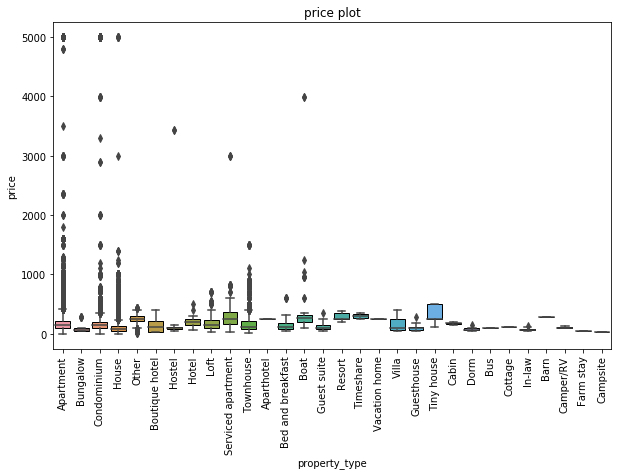

In [285]:
plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='property_type', y='price', data=df1)
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('price plot')
plt.xticks(rotation=90)

In [100]:
df[df['price'] > 400].head()

,accommodates,amenities,bathrooms,bedrooms,beds,cleaning_fee,description,extra_people,guests_included,minimum_nights,...,Neighborhood_South Boston,Neighborhood_South Boston Waterfront,Neighborhood_South End,Neighborhood_West End,Neighborhood_West Roxbury,Cancellation_moderate,Cancellation_strict,Cancellation_strict_14_with_grace_period,Cancellation_super_strict_30,Cancellation_super_strict_60
49,7,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",2.0,4.0,4.0,150.0,Beacon Hill Million Dollar Views + Roof Deck! ...,50.0,6,5,...,0,0,0,0,0,0,1,0,0,0
94,4,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1.0,2.0,2.0,109.0,At this Sonder you'll love the lovely exposed-...,0.0,1,2,...,0,0,0,0,0,0,1,0,0,0
134,7,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",2.0,4.0,4.0,180.0,Beacon Hill Million Dollar Views + Roof Deck! ...,50.0,6,5,...,0,0,0,0,0,0,0,1,0,0
178,4,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1.0,2.0,2.0,109.0,At this Sonder you'll love the lovely exposed-...,0.0,1,2,...,0,0,0,0,0,0,0,1,0,0
201,2,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",1.0,1.0,1.0,55.0,Beacon Hill with a Beautiful Cat! Beacon Hill ...,45.0,2,2,...,0,0,0,0,0,0,0,1,0,0


In [101]:
data = df.copy()
data.drop(columns=['amenities','description','name','neighborhood_overview','property_type','space','summary'], inplace=True)

In [102]:
data['zipcode'].unique()

array([ 1217,  2026,  2108,  2109,  2110,  2111,  2113,  2114,  2115,
        2116,  2118,  2119,  2120,  2121,  2122,  2124,  2125,  2126,
        2127,  2128,  2129,  2130,  2131,  2132,  2134,  2135,  2136,
        2138,  2139,  2141,  2142,  2143,  2145,  2149,  2150,  2151,
        2152,  2163,  2171,  2180,  2186,  2199,  2210,  2215,  2222,
        2421,  2445,  2446,  2447,  2458,  2459,  2467,  2472, 33131],
      dtype=int64)

In [384]:
data.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'extra_people', 'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'zipcode',
       'ammenties_count', 'Bed_Couch', 'Bed_Futon', 'Bed_Pull-out Sofa',
       'Bed_Real Bed', 'Room_Private room', 'Room_Shared room',
       'Neighborhood_Back Bay', 'Neighborhood_Bay Village',
       'Neighborhood_Beacon Hill', 'Neighborhood_Brighton',
       'Neighborhood_Charlestown', 'Neighborhood_Chinatown',
       'Neighborhood_Dorchester', 'Neighborhood_Downtown',
       'Neighborhood_East Boston', 'Neighborhood_Fenway',
       'Neighborhood_Harbor Islands', 'Neighborhood_Hyde Park',
       'Neighborhood_Jamaica Plain', 'Neighborhood_Leather District',
       'Neighborhood_Longwood Medical Area', 'Neighborhood_Mattapan',
       'Neighborhood_Mission Hill', 'Neighborhood_North End',
       'Neighborhood_Roslindale', 'Neighborhood_Roxbury',
       'Neighborhood_South Boston', 'Neighborh

In [360]:
data.drop(columns=['security_deposit'],inplace=True)

In [361]:
data = data[~(data[['price']] == 0).any(axis=1)]
data = data[~(data['price'] > 300)]
data['price'].unique()

array([124., 141., 198., 118., 161.,  75.,  80.,  60.,  95.,  50.,  65.,
        89.,  70., 107., 200., 150.,  30., 247., 140.,  99., 154., 175.,
       110., 195., 299., 185., 115., 180., 119., 229., 250., 220., 100.,
       289., 218., 259., 285., 249., 295., 287., 291., 225., 160.,  88.,
       189., 209., 199., 129., 275., 132., 147., 179., 269., 158., 157.,
        79., 139., 109., 146., 300., 130., 149., 120., 165., 279., 208.,
       207., 288., 274., 214., 268., 230., 281., 283., 236., 231., 223.,
       235., 278., 292., 277., 290., 251., 143., 159., 163., 145., 191.,
        92., 125., 176., 215., 270., 103., 135.,  45., 245., 210., 255.,
       116.,  69.,  49.,  59.,  83., 194., 137., 144., 190., 201., 138.,
       142., 222., 228., 152., 224., 280., 212., 217., 202., 155., 188.,
        63.,  64., 203., 169., 240.,  57., 219., 164., 265., 234., 177.,
       148., 131., 134., 127., 136., 128., 122., 216., 182., 181., 178.,
       226., 248., 168., 286., 171., 186., 276., 18

In [362]:
data = data.reset_index(drop=True)
data.shape

(54033, 49)

In [363]:
y = data['price']
data.drop(columns=['price'], inplace=True)
X = data

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

## Random Forest Regressor

In [367]:
from sklearn.preprocessing import StandardScaler
def random_forest(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)  
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    return mape_train, y_pred_test, mape_test, mse_test, rmse_test, model

In [368]:
regressor = RandomForestRegressor()  
print(regressor)
mape_train, y_pred_test, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', mape_train,'MAPE for test is: ', mape_test,'MSE for test is: ', mse_test, 'RMSE for test is: ', rmse_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAPE for train is:  3.084611077337139 MAPE for test is:  7.301616295072491 MSE for test is:  396.95746594528083 RMSE for test is:  19.923791455074028


### 5-fold cross-validation

In [256]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
importances = model.feature_importances_
X_feat = data.values
Y_feat = y.values
print(kf) 

max_depth_list = [3,4,5,6,7,8]
for depth in max_depth_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    regressor = RandomForestRegressor(n_estimators=10, max_depth= depth) 

    for i, j in kf.split(X_feat):
        X_train, X_test = X_feat[i], X_feat[j]
        y_train, y_test = Y_feat[i], Y_feat[j]
        mape_train, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    print("depth = ",depth, MAPE_TEST)

KFold(n_splits=5, random_state=None, shuffle=False)
depth =  3 [55.59678966714928]
depth =  4 [56.96798641224734]
depth =  5 [53.09692404432798]
depth =  6 [49.24219439319823]
depth =  7 [48.48900203504291]
depth =  8 [58.56443796677772]


In [257]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
importances = model.feature_importances_
X_feat = data.values
Y_feat = y.values
print(kf) 

max_depth_list = [3,4,5,6,7,8]
for depth in max_depth_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    regressor = RandomForestRegressor(n_estimators=15, max_depth= depth) 

    for i, j in kf.split(X_feat):
        X_train, X_test = X_feat[i], X_feat[j]
        y_train, y_test = Y_feat[i], Y_feat[j]
        mape_train, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    print("depth = ",depth, MAPE_TEST)

KFold(n_splits=5, random_state=None, shuffle=False)
depth =  3 [58.17128509806463]
depth =  4 [57.98280713284162]
depth =  5 [53.20014728572813]
depth =  6 [50.04286993689174]
depth =  7 [50.00508373520128]
depth =  8 [51.45699397710219]


## Grid-search to find the best parameters

In [331]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
regressor = RandomForestRegressor() 
param_grid = {"n_estimators": [20,25,30,40,200],
              "max_features": ['auto', 'sqrt', 'log2'],
             "max_depth": [1,5,10,15]}

grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print(grid_search.score)

KFold(n_splits=5, random_state=None, shuffle=False)
<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 25, 30, 40, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>


In [332]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}

## Running the model based on the results from grid-search

In [333]:
regressor = RandomForestRegressor(n_estimators= 200, max_depth= 15, max_features= 'sqrt')  
print(regressor)
mape_train, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', mape_train,'MAPE for test is: ', mape_test,'MSE for test is: ', mse_test, 'RMSE for test is: ', rmse_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """


MAPE for train is:  19.770637105699755 MAPE for test is:  21.1686641071689 MSE for test is:  973.764638606161 RMSE for test is:  31.20520210808065


## Comparing the model with best parameters and default parameters

In [346]:
regressor = RandomForestRegressor(n_estimators= 'warn', max_depth= None, max_features= 'auto')  
print(regressor)
mape_train, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', mape_train,'MAPE for test is: ', mape_test,'MSE for test is: ', mse_test, 'RMSE for test is: ', rmse_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAPE for train is:  3.1274735985691207 MAPE for test is:  7.266626285745947 MSE for test is:  398.52014055571726 RMSE for test is:  19.96296923194837


#### As we can see the random forest MAPE is lower witht he default parameters,so we are going to use the model with it's default parameters